# Web Scraping for Indeed.com and Predicting Salaries

## Project Overview

### Business Case Overview

The aim of the project is to leverage data to help a rapidly expanding contracting firm win more bids for contracts. The firm offers technology and scientific solutions and wants to be competitive in the hiring market and take on more experts in the Data Science field. 

**Main Objective:**
   - Determine the industry factors that are most important in predicting the salary amounts for the data to be scraped from www.indeed.com.

The specific job roles to be targeted are data scientist, data analyst, research scientist, business intelligence, and more.

### Factors that impact salary

The aim is to estimate which factors (like location, job title, job level, industry sector) lead to high or low salary via classification model, and from there conduct some analysis to investigate the impacts of these factors. 

To do so, the salary is to be split into two groups of high and low salary, using the median salary as a threshold.

### Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

In [2]:
import requests
import bs4
from bs4 import BeautifulSoup
import time
from tqdm import tqdm
import numpy as np
import pandas as pd
import math

### Information Extraction Functions

The functions below will be used to parse out the 4 fields - location, title, company and salary.

In [3]:
def extract_location(result):
    try:
        return result.find('span', attrs={'class': 'location'}).text
    except:
        return np.nan

In [4]:
def extract_company(result):
    try:
        return result.find('span', attrs={'class': 'company'}).text.strip('\n')
    except:
        return np.nan

In [5]:
def extract_job_title(result):
    try:
        return result.find('a', attrs={'class': 'jobtitle', 'data-tn-element': 'jobTitle'}).text.replace('\n', ' ').strip()
    except:
        return np.nan

In [6]:
def extract_salary(result):
    try:
        return result.find('span', attrs={'class': 'salaryText'}).text.replace('$', '').replace(',', '').strip('\n')
    except:
        return np.nan

In [190]:
def page_total(city):
    url = url = f"http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l={city}&start=0"
    results = requests.get(url)
    soup = BeautifulSoup(results.text, 'html.parser')
    return math.ceil(int(soup.find('div', attrs={'id': 'searchCountPages'}).text.split('of')[1].strip('jobs').strip(' ').replace(',', ''))/15)

#### For the UK

In [10]:
from collections import defaultdict
from IPython.display import clear_output

max_results_per_city = 5000 # Set this to a high-value (5000) to generate more results. 
# Crawling more results, will also take much longer. First test your code on a small number of results and then expand.

results = defaultdict(list)
status = defaultdict(list)

captcha=False

# while loop for repeating until certain amount of data is scraped - storing the city and result each time so we can continue from this point
# countries = [england, united_states, singapore]
# england = ['Chester' 'London', 'Manchester', 'Liverpool', 'Leeds', 'York', 'Bradford', 
#     'Milton+Keynes', 'Reading', 'Birmingham', 'Cardiff', 'Wolverhampton', 
#     'Edinburgh', 'Glasgow', 'Huddersfield', 'Crewe', 'Warwick', 'Oxford', 
#     'Cambridge', 'Bournemouth']

for city in set(['London', 'Liverpool']):
#     pages = page_total(city)
    for start in tqdm(range(0, max_results_per_city, 10)):
        url = f"https://uk.indeed.com/jobs?q=data+scientist&l={city}&start={start}"
        result = requests.get(url)
        status[city].append(result.status_code)
        soup = BeautifulSoup(result.text, 'html.parser')
        if 'hCaptcha' not in str(soup.prettify):
            for post in soup.find_all('div', attrs={'class':'jobsearch-SerpJobCard'}):
                results['title'].append(extract_job_title(post))
                results['company'].append(extract_company(post))
                results['location'].append(extract_location(post))
                results['currency'].append('GBP')
                results['country'].append('britain')
                results['salary'].append(extract_salary(post))
            time.sleep(30)
        else:
            print('Caught')
            city_cursor = city
            page_cursor = start
            captcha=True
            break
    if captcha==True:
        break
    time.sleep(20)


print(f'Stopped at {city_cursor}, page {int(page_cursor/10)}')



100%|██████████| 500/500 [5:33:41<00:00, 40.04s/it]    


NameError: name 'city_cursor' is not defined

#### For the US

In [197]:
from collections import defaultdict
from IPython.display import clear_output

max_results_per_city = 5000 # Set this to a high-value (5000) to generate more results. 
# Crawling more results, will also take much longer. First test your code on a small number of results and then expand.

results = defaultdict(list)
status = defaultdict(list)

captcha=False

# while loop for repeating until certain amount of data is scraped - storing the city and result each time so we can continue from this point
# countries = [england, united_states, singapore]
# england = ['Chester' 'London', 'Manchester', 'Liverpool', 'Leeds', 'York', 'Bradford', 
#     'Milton+Keynes', 'Reading', 'Birmingham', 'Cardiff', 'Wolverhampton', 
#     'Edinburgh', 'Glasgow', 'Huddersfield', 'Crewe', 'Warwick', 'Oxford', 
#     'Cambridge', 'Bournemouth']

for city in set(['Seattle']):
#     pages = page_total(city)
    for start in tqdm(range(0, max_results_per_city, 10)):
        url = f"http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l={city}&start={start}"
        result = requests.get(url)
        status[city].append(result.status_code)
        soup = BeautifulSoup(result.text, 'html.parser')
        if 'hCaptcha' not in str(soup.prettify):
            for post in soup.find_all('div', attrs={'class':'jobsearch-SerpJobCard'}):
                results['title'].append(extract_job_title(post))
                results['company'].append(extract_company(post))
                results['location'].append(extract_location(post))
                results['currency'].append('USD')
                results['country'].append('usa')
                results['salary'].append(extract_salary(post))
            time.sleep(40)
        else:
            print('Caught')
            city_cursor = city
            page_cursor = start
            captcha=True
            break
    if captcha==True:
        break
    time.sleep(20)


print(f'Stopped at {city_cursor}, page {int(page_cursor/10)}')

 72%|███████▏  | 359/500 [3:07:05<1:13:28, 31.27s/it]

Caught
Stopped at Portland, page 359


#### For Singapore

In [160]:
from collections import defaultdict
from IPython.display import clear_output

max_results_per_city = 5000 # Set this to a high-value (5000) to generate more results. 
# Crawling more results, will also take much longer. First test your code on a small number of results and then expand.

results = defaultdict(list)
status = defaultdict(list)

captcha=False

for start in tqdm(range(0, max_results_per_city, 10)):
    url = f"https://sg.indeed.com/jobs?q=Data+Scientist&start={start}"
    result = requests.get(url)
    soup = BeautifulSoup(result.text, 'html.parser')
    if 'hCaptcha' not in str(soup.prettify):
        for post in soup.find_all('div', attrs={'class':'jobsearch-SerpJobCard'}):
            results['title'].append(extract_job_title(post))
            results['company'].append(extract_company(post))
            results['location'].append(extract_location(post))
            results['currency'].append('SGD')
            results['country'].append('singapore')
            results['salary'].append(extract_salary(post))
        time.sleep(25)
    else:
        print('Caught')
        city_cursor = city
        page_cursor = start
        captcha=True
        break
if captcha==True:
    break
time.sleep(20)


print(f'Stopped at {city_cursor}, page {int(page_cursor/10)}')

 32%|███▏      | 159/500 [1:11:19<2:32:58, 26.92s/it]


ConnectionError: HTTPSConnectionPool(host='sg.indeed.com', port=443): Max retries exceeded with url: /jobs?q=Data+Scientist&start=1590 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7ff509a3d1f0>: Failed to establish a new connection: [Errno 60] Operation timed out'))

In [1503]:
# results.head()

In [1504]:
# pd.DataFrame(results).shape

<!-- # cities = ['New+York', 'Chicago', 'San+Francisco', 'Austin', 'Seattle', 
#     'Los+Angeles', 'Philadelphia', 'Atlanta', 'Dallas', 'Pittsburgh', 
#     'Portland', 'Phoenix', 'Denver', 'Houston', 'Miami']

# from collections import defaultdict
# from IPython.display import clear_output

# max_results_per_city = 400 # Set this to a high-value (5000) to generate more results. 
# # Crawling more results, will also take much longer. First test your code on a small number of results and then expand.

# results = defaultdict(list)
# status = defaultdict(list) -->

<!-- # def scraper(cities, city_tracker, cursor):
#     captcha = False
#     results = defaultdict(list)
#     for i in range(city_tracker, len(cities)):
#         print(f'Scraping for {cities[i]}')
#         for start in tqdm(range(cursor, max_results_per_city, 10)):
#             cursor=0
#             url = f"http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l={city}&start={start}"
#             result = requests.get(url)
#             soup = BeautifulSoup(result.text, 'html.parser')
#             if 'hCaptcha' not in str(soup.prettify):
#                 for post in soup.find_all('div', attrs={'class':'jobsearch-SerpJobCard'}):
#                     results['title'].append(extract_job_title(post))
#                     results['company'].append(extract_company(post))
#                     results['location'].append(extract_location(post))
#                     results['salary'].append(extract_salary(post))
#                 time.sleep(3)
#             else:
#                 print('caught')
#                 city_cursor = city
#                 page_cursor = start
#                 captcha = True
#                 break
#         if captcha == True:
#             break
#         time.sleep(15)
#     return results, city_cursor, page_cursor -->

<!-- # #intialise page and city trackers
# max_results_per_city = 300
# page = 0
# city = 0
# page = 0
# first_set = True
# while (page < max_results_per_city) and (city != len(cities)):
#     results, city, page = scraper(cities, city, page)
#     if first_set==True:
#         results_main = results
#     else:
#         results_main.update(results)
#     time.sleep(120) -->

In [205]:
spare_res = results.copy()

#### Create a dataframe from the results with the parsed information.

In [207]:
jobs_all = pd.DataFrame(results, columns = ['title', 'company', 'location', 'salary', 'country', 'currency'])

In [208]:
jobs_all.shape

(2405, 6)

Lastly, we need to clean up salary data. 

1. Only a small number of the scraped results have salary information - only these will be used for modeling.
1. Some of the salaries are not yearly but hourly or weekly, these will not be useful to us for now.
1. Some of the entries may be duplicated.
1. The salaries are given as text and usually with ranges.

#### Find the entries with annual salary entries, by filtering the entries without salaries or salaries that are not yearly (filter those that refer to hour or week). Also, remove duplicate entries.

In [209]:
jobs = jobs_all.drop_duplicates()
jobs.dropna(inplace=True)
jobs = jobs[jobs.salary.str.contains('year')]
jobs.reset_index(drop=True, inplace=True)
jobs.tail()

<ipython-input-209-d3b47e6ef2d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs.dropna(inplace=True)


,title,company,location,salary,country,currency
0,Data Scientist - Nationwide Opportunities,"Amazon Web Services, Inc.","Portland, OR",114700 a year,usa,USD


In [210]:
jobs.location.unique()[:5]

array(['Portland, OR'], dtype=object)

#### Write a function that takes a salary string and converts it to a number, averaging a salary range if necessary.

In [211]:
import re

def salary_formatter(sal):
    split = re.findall(r'[0-9]+', sal)
    if len(split)>1:
        return sum([float(val) for val in split])/len(split)
    return float(split[0])

salary_formatter('$114700 - £120000 a year')

117350.0

In [212]:
jobs.salary = jobs.salary.apply(salary_formatter)

In [213]:
jobs.head()

,title,company,location,salary,country,currency
0,Data Scientist - Nationwide Opportunities,"Amazon Web Services, Inc.","Portland, OR",114700.0,usa,USD


### Save results as a CSV

In [267]:
jobsdb = pd.read_csv('./jobs.csv')
jobsdb.reset_index(drop=True)
jobs.reset_index(drop=True)
jobs_new = pd.concat([jobsdb, jobs], axis=0)
jobs_new.drop(['Unnamed: 0'], axis=1, inplace=True)
jobs_new.drop_duplicates(inplace=True)
jobs_new.to_csv(path_or_buf='./jobs.csv')

### Load in the data of scraped salaries

In [560]:
jobs_load = pd.read_csv('./jobs.csv')
jobs_load.drop(['Unnamed: 0'], axis=1, inplace=True)

In [563]:
jobs_load.tail()

,title,company,location,salary,country,currency
523,Data Scientist for an AI Fintech Company,Finest People,Singapore,96000.0,singapore,SGD
524,Data Scientist,Top20Talent,Singapore,90150.0,singapore,SGD
525,Software Engineering Senior Manager - Applicat...,Indeed,Singapore,202000.0,singapore,SGD
526,Senior Software Engineer (International Busine...,Indeed,Singapore,128500.0,singapore,SGD
527,"Amazon Web Services, Inc.",Data Scientist - Nationwide Opportunities,"Portland, OR",114700.0,usa,USD


In [564]:
# pip install --user currencyconverter

In [565]:
from currency_converter import CurrencyConverter

In [566]:
def currency(amount, FROM='GBP', TO='USD'):
    currency = CurrencyConverter()
    return currency.convert(amount, FROM, TO)

In [567]:
jobs_load_sort = jobs_load.sort_values(by=['country', 'location', 'title'], ascending=True)

In [568]:
jobs_load_sort.reset_index(drop=True, inplace=True)

In [569]:
jobs_load_sort.isnull().sum()

title       0
company     0
location    0
salary      0
country     0
currency    0
dtype: int64

In [570]:
jobs = jobs_load_sort.copy()

In [571]:
jobs.salary = jobs.apply(lambda x: round(currency(x[3], FROM=x[-1]), 2), axis=1)

In [572]:
jobs.shape

(528, 6)

### We want to predict a binary variable - whether the salary was low or high. Below we will compute the median salary and create a new binary variable that is true when the salary is high (above the median).

We could also perform Linear Regression (or any regression) to predict the salary value here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW salary.

While performing regression may be better, performing classification may help remove some of the noise of the extreme salaries. We don't have to choose the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of salaries.

However, in this case I have opted to move forward with analysis of the two categories of Higher than Median, and Lower than Median.

In [1]:
median = jobs.salary.median()

def hi_or_lo(salary):
    if salary < median:
        return 'Lower'
    return 'Higher'

NameError: name 'jobs' is not defined

In [ ]:
jobs['median_high_low'] = jobs.salary.apply(hi_or_lo)

In [576]:
jobs.head(20)

,title,company,location,salary,country,currency,median_high_low
0,Senior Data Engineer (Machine Learning & AI us...,Nuvola Resourcing,Chertsey,91549.61,england,GBP,Low
1,Data Scientist,Sykes Cottages,Chester CH1 3BQ,63380.50,england,GBP,Low
2,Data Scientist,Public Health England,Colindale NW9,50719.89,england,GBP,Low
3,Higher Statistical Data Scientist - across the...,UK Government - Government Statistical Service,Croydon,37184.64,england,GBP,Low
4,Senior Statistical Data Scientist - across the...,UK Government - Government Statistical Service,Croydon,48014.25,england,GBP,Low
5,Junior data science engineer,KC TECH PVT LTD,Dartford DA1 5GA,32394.48,england,GBP,Low
6,Data Scientist,NHS Midlands and Lancashire Commissioning Supp...,Leyland PR26 6TR,68606.58,england,GBP,Low
7,"AI Advisory / Data Science Advisory, Senior Ma...",Lawrence Harvey,London,169014.67,england,GBP,High
8,AI Architect – London,kdr Recruitment,London,119718.73,england,GBP,High
9,Agile Project Manager - Data Analytics,ShareForce,London,95070.75,england,GBP,Low


In [577]:
from geopy import Nominatim

In [578]:
def geo_loc(loc):
    try:
        geolocation = Nominatim(user_agent="app").geocode(loc)
        return geolocation.longitude, geolocation.latitude
    except:
        return np.nan

In [579]:
def geo_lon(loc):
    try:
        geolocation = Nominatim(user_agent="app").geocode(loc)
        return geolocation.longitude
    except:
        return np.nan

In [580]:
def geo_lat(loc):
    try:
        geolocation = Nominatim(user_agent="app").geocode(loc)
        return geolocation.latitude
    except:
        return np.nan

In [581]:
geo_loc('brooklyn, ny 11201')

(-73.9495823, 40.6501038)

In [582]:
jobs_geo = jobs.copy()

In [583]:
jobs_geo['geo'] = jobs_geo.location.apply(geo_loc)
jobs_geo['longitude'] = jobs_geo.location.apply(geo_lon)
jobs_geo['latitude'] = jobs_geo.location.apply(geo_lat)

In [584]:
jobs_geo.isnull().sum()

title               0
company             0
location            0
salary              0
country             0
currency            0
median_high_low     0
geo                35
longitude          35
latitude           35
dtype: int64

As we can see above, some of the location data could not be processed by the geolocator. Therefore it may not be optimal to try to build a model in this way since some valuable data is lost and it may not be applicable to some of the data we might like to make predictions for. Regardless, we will fit a model using this data and observe any difference in scores.

In [585]:
jobs_geo.dropna(inplace=True)

#### What is the baseline accuracy for this model?

In [586]:
jobs.median_high_low.value_counts(normalize=True)

High    0.524621
Low     0.475379
Name: median_high_low, dtype: float64

In [587]:
print(f'baseline score is {round(jobs.median_high_low.value_counts(normalize=True)[0], 4)}')

baseline score is 0.5246


<!--     The baseline accuracy for the model is 0.538. -->

### Classification model to predict High/Low salary. 

Initially ONLY using the location as a feature, we will investigate the effect on roles that differing cities and countries has.

Following this we will generate some new features, tune the models' parameter ranges and regularization strengths and predict based on all features to test for added value, and investigate coefficients and feature importances.

In [588]:
def lower(string):
    if type(string)==str:
        return string.lower()
    return string

jobs = jobs.applymap(lower)

In [1501]:
jobs.head()

,title,company,location,salary,country,currency,median_high_low
0,senior data engineer (machine learning & ai us...,nuvola resourcing,chertsey,91549.61,england,gbp,low
1,data scientist,sykes cottages,chester ch1 3bq,63380.50,england,gbp,low
2,data scientist,public health england,colindale nw9,50719.89,england,gbp,low
3,higher statistical data scientist - across the...,uk government - government statistical service,croydon,37184.64,england,gbp,low
4,senior statistical data scientist - across the...,uk government - government statistical service,croydon,48014.25,england,gbp,low


In [1500]:
pd.DataFrame(pd.DataFrame(jobs.company.unique()).sort_values(by=0))[0].unique()[:5]

array(['1st franklin financial corporation', '720 management',
       '9th networks inc', 'additional resources', 'adlib'], dtype=object)

In [591]:
# def key_words(title):
#     

def title_cleaner(title):
    return title.replace('sr.', 'senior').replace('sr', 'senior')

# def senior(title):
#     if ('senior' in title) or ('sr' in title):
#         return 1
#     return 0

# def manager(title):
#     if 'manag' in title:
#         return 1
#     return 0

# def lead(title):
#     if 'lead' in title:
#         return 1
#     return 0

# ['senior', 'manager', 'lead']

In [592]:
jobs.title = jobs.title.apply(title_cleaner)
# jobs['senior'] = jobs['title'].apply(senior)
# jobs['manager'] = jobs['title'].apply(manager)
# jobs['lead'] = jobs['title'].apply(lead)

### For the models, I am going to test Decision Trees and Logistic Regression. I will then test both voting and stacking ensemble methods using a RandomForestClassifier, as well as a GradientBoostClassifier.

In [594]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In terms of feature scaling, since there are no numeric columns bar salary which is not included in the predictor data, column transformers will be used to extract features.

It is also noted that there is an imbalance issue in the country column, with England having far more datapoints than Singapore.
Oversampling may lead to biased data regarding Singapore jobs, whereas Undersampling would remove the majority of the data required for proper training of the model.

#### Test using the longitude and latitude extracted by geopy's Nominatim

##### set up the X, y and train-test sets

In [595]:
y = jobs_geo['median_high_low']

In [596]:
X = jobs_geo[['longitude', 'latitude']]

In [597]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

##### decision tree classifier

In [598]:
dtc_ll = DecisionTreeClassifier().fit(X_train, y_train)

In [599]:
dtc_ll.score(X_train, y_train)

0.6928934010152284

In [600]:
dtc_ll.score(X_test, y_test)

0.6060606060606061

In [601]:
dtc_ll.feature_importances_

array([0.27, 0.73])

##### logistic regression

In [602]:
log_ll = LogisticRegression().fit(X_train, y_train)

In [603]:
log_ll.score(X_train, y_train)

0.6091370558375635

In [604]:
log_ll.score(X_test, y_test)

0.5858585858585859

#### Test using the location variable, countvectorized to find commonalities

##### set up the X, y and train-test sets

In [605]:
jobs_restricted = jobs[(jobs.country=='usa')|(jobs.country=='england')]

In [606]:
jobs_restricted.shape

(519, 7)

In [607]:
y = jobs_restricted['median_high_low']

In [608]:
X = jobs_restricted[['location']]

In [609]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

##### pipeline with a decision tree classifier

In [610]:
cvec_location = CountVectorizer(stop_words='english', max_df=0.9, min_df=1)
dtc_loc = DecisionTreeClassifier()

In [611]:
col_trans = ColumnTransformer([('location', cvec_location, 'location')], remainder='passthrough')

In [612]:
pipe_loc_dtc = make_pipeline(col_trans, dtc_loc)

In [613]:
pipe_loc_dtc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('location',
                                                  CountVectorizer(max_df=0.9,
                                                                  stop_words='english'),
                                                  'location')])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [614]:
pipe_loc_dtc.score(X_train, y_train)

0.7325301204819277

In [615]:
pipe_loc_dtc.score(X_test, y_test)

0.6346153846153846

##### pipeline with a logistic regression model

In [616]:
log_loc = LogisticRegression()

In [617]:
pipe_loc_log = make_pipeline(col_trans, log_loc)

In [618]:
pipe_loc_log.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('location',
                                                  CountVectorizer(max_df=0.9,
                                                                  stop_words='english'),
                                                  'location')])),
                ('logisticregression', LogisticRegression())])

In [619]:
pipe_loc_log.score(X_train, y_train)

0.7108433734939759

In [620]:
pipe_loc_log.score(X_test, y_test)

0.6153846153846154

In [621]:
feature_columns = pipe_loc_log['columntransformer'].get_feature_names()

In [622]:
feature_columns[:5]

['location__11101',
 'location__11201',
 'location__12206',
 'location__1jd',
 'location__1rt']

In [623]:
len('location__')

10

In [624]:
feature_names = [col[len('location__'):] for col in feature_columns]

In [625]:
feature_names

['11101',
 '11201',
 '12206',
 '1jd',
 '1rt',
 '30030',
 '30071',
 '30308',
 '30324',
 '30326',
 '3bq',
 '3qg',
 '5ga',
 '5jj',
 '60601',
 '60614',
 '6jh',
 '6tr',
 '73301',
 '75023',
 '75024',
 '75038',
 '75201',
 '75207',
 '78701',
 '78741',
 '78757',
 '78758',
 '7jr',
 '7rl',
 '80021',
 '80027',
 '80111',
 '80112',
 '80120',
 '80124',
 '80202',
 '80204',
 '80225',
 '80230',
 '80237',
 '80301',
 '80305',
 '80309',
 '85007',
 '85284',
 '85308',
 '8bh',
 '8jt',
 '8qs',
 '8sd',
 '90023',
 '94070',
 '94080',
 '94108',
 '94720',
 '98052',
 '98101',
 '98104',
 '9bj',
 'albany',
 'angeles',
 'area',
 'atlanta',
 'auraria',
 'austin',
 'az',
 'b15',
 'b75',
 'berkeley',
 'birmingham',
 'boulder',
 'boulevard',
 'boyle',
 'brooklyn',
 'broomfield',
 'buckhead',
 'burnett',
 'business',
 'ca',
 'campus',
 'carlos',
 'central',
 'ch1',
 'chertsey',
 'chester',
 'chicago',
 'city',
 'coldfield',
 'colindale',
 'colorado',
 'corners',
 'cottonwood',
 'coventry',
 'creek',
 'croydon',
 'da1',
 'da

In [626]:
pipe_loc_log['logisticregression'].coef_[0]

array([ 0.46,  0.3 , -0.55,  0.29,  0.52, -0.26, -0.21, -0.28,  0.39,
        0.39,  0.3 , -0.34,  0.3 ,  0.34, -0.36, -0.2 ,  0.23,  0.44,
       -0.11, -0.46,  0.35,  0.23,  0.59, -0.32,  0.59,  0.38, -0.2 ,
       -0.47, -0.34,  0.27, -0.82, -0.56,  0.44, -0.33,  0.02, -0.28,
       -0.13,  0.45, -0.33,  0.65,  0.43, -0.37,  0.6 ,  0.31,  0.13,
       -0.35,  0.19, -0.42,  0.23,  0.34,  0.29, -0.15, -0.19,  0.44,
       -0.22,  0.47, -0.23, -0.17, -0.17,  0.28, -0.55, -0.54,  0.58,
       -0.2 ,  0.45, -0.73,  0.16,  0.26,  0.27,  0.47,  0.84, -1.06,
       -0.32, -0.15,  0.3 , -0.66,  0.39, -0.47, -0.13, -0.76, -0.55,
       -0.19,  0.6 ,  0.3 ,  0.7 ,  0.3 , -0.76,  0.13,  0.27,  0.54,
        0.31, -0.21,  0.23,  0.7 , -0.2 ,  0.7 ,  0.3 , -0.1 ,  0.3 ,
       -0.26,  0.19, -1.2 , -0.31, -0.35,  0.34,  0.63, -0.11, -0.33,
        0.65, -0.22, -0.03, -0.67,  0.19,  0.41,  0.59,  0.44,  0.03,
       -0.15, -0.32, -0.96, -0.56, -0.66,  0.62,  0.72, -0.33,  0.38,
        0.35,  0.78,

In [627]:
coefficients = pd.DataFrame(zip(feature_names, pipe_loc_log['logisticregression'].coef_[0]), columns=['name', 'coef'])

In [628]:
coefficients.sort_values(by='coef', ascending=False)

,name,coef
140,manchester,1.403466
170,south,0.869096
70,birmingham,0.839752
127,leeds,0.781550
156,plano,0.754249
...,...,...
161,reigate,-0.854700
187,wa,-0.901728
119,houston,-0.960330
71,boulder,-1.062113


##### test using all available variables

##### set up the X, y and train-test sets

In [629]:
jobs_test = jobs.copy()

In [630]:
y = jobs_test.pop('median_high_low')

In [631]:
X = jobs_test[['title', 'company', 'location']]

In [632]:
X = jobs_test[['title', 'company', 'location', 'country']]

In [633]:
X

,title,company,location,country
0,senior data engineer (machine learning & ai us...,nuvola resourcing,chertsey,england
1,data scientist,sykes cottages,chester ch1 3bq,england
2,data scientist,public health england,colindale nw9,england
3,higher statistical data scientist - across the...,uk government - government statistical service,croydon,england
4,senior statistical data scientist - across the...,uk government - government statistical service,croydon,england
...,...,...,...,...
523,data scientist,omnivis,"south san francisco, ca 94080",usa
524,senior data scientist | fte,martian wall pvt ltd,"tempe, az",usa
525,senior data scientist,global nephrology solutions,"tempe, az 85284",usa
526,data scientist,innovar group,"westminster, co",usa


In [634]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

Since there is much variance in related job titles for the job posts, and also post codes, NLP will be used to harness any variation in input of information to the job posts.

Upon looking at unique values for the Company column, they seemed to be well standardised and there didn't seem much need to use NLP on the column since all instances of the same company would be recognised under one dummy heading. 

However, after reviewing the difference in scores between OneHotEncoder and CountVectorizer used on the company columns, both test and train scores whereby the Company column has been CountVectorized turn out better. Therefore NLP has been used on all text columns: Title, Company and Location. 

##### decision tree pipeline

In [635]:
cvec_title = CountVectorizer(stop_words='english')
cvec_company = CountVectorizer(stop_words='english')
cvec_location = CountVectorizer(stop_words='english', max_df=0.9, min_df=1)
ohe = OneHotEncoder(handle_unknown='ignore')
dtc = DecisionTreeClassifier()

In [636]:
col_trans = ColumnTransformer([('title', cvec_title, 'title'), ('company', cvec_company, 'company'), ('location', cvec_location, 'location'), ('country', ohe, ['country'])], remainder='passthrough')

In [637]:
pipe_dtc = make_pipeline(col_trans, dtc)

In [638]:
pipe_dtc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('title',
                                                  CountVectorizer(stop_words='english'),
                                                  'title'),
                                                 ('company',
                                                  CountVectorizer(stop_words='english'),
                                                  'company'),
                                                 ('location',
                                                  CountVectorizer(max_df=0.9,
                                                                  stop_words='english'),
                                                  'location'),
                                                 ('country',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                       

In [639]:
pipe_dtc.score(X_train, y_train)

0.9976303317535545

In [640]:
pipe_dtc.score(X_test, y_test)

0.8207547169811321

In [2]:
# CVEC
# Train
# 0.9961977186311787

# Test
# 0.7878787878787878

# WITHOUT COUNTRY

# OHE
# Train
# 0.9961977186311787

# Test
# 0.7727272727272727

##### logistic regression pipeline

In [642]:
cvec_title = CountVectorizer(stop_words='english')
cvec_company = CountVectorizer(stop_words='english')
cvec_location = CountVectorizer(stop_words='english', max_df=0.9, min_df=1)
ohe = OneHotEncoder(handle_unknown='ignore')
log = LogisticRegression()

In [643]:
col_trans = ColumnTransformer([('title', cvec_title, 'title'), ('company', cvec_company, 'company'), ('location', cvec_location, 'location'), ('country', ohe, ['country'])], remainder='passthrough')

In [644]:
pipe_log = make_pipeline(col_trans, log)

In [645]:
pipe_log.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('title',
                                                  CountVectorizer(stop_words='english'),
                                                  'title'),
                                                 ('company',
                                                  CountVectorizer(stop_words='english'),
                                                  'company'),
                                                 ('location',
                                                  CountVectorizer(max_df=0.9,
                                                                  stop_words='english'),
                                                  'location'),
                                                 ('country',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                       

In [646]:
pipe_log.score(X_train, y_train)

0.9620853080568721

In [647]:
pipe_log.score(X_test, y_test)

0.8018867924528302

In [648]:
# ohe company
# train
# 0.9581749049429658
# test
# 0.7424242424242424

# WITHOUT COUNTRY

# cvec company
# train
# 0.9695817490494296

# test
# 0.7575757575757576

The addition of the new features adds a large amount of value to the models, with accuracy scores of both training and test predictions increasing immediately by a large margin given that the nature of roles, levels of seniority and the companies offering the roles now being taken into account. Prior to the new features, the model was attempting to find trends between roles that were distinctly different.

### Now onto the Ensemble Methods

In [649]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

#### Gradient Boost

In [665]:
log_gb = LogisticRegression()
dtc_gb = DecisionTreeClassifier()

#### using init = None

In [750]:
gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 30,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [762]:
gbc = GradientBoostingClassifier(random_state=0)

In [763]:
gbc_pipe = make_pipeline(col_trans, gbc).fit(X_train, y_train)

In [764]:
gbc_pipe.score(X_train, y_train)

0.9265402843601895

In [765]:
gbc_pipe.score(X_test, y_test)

0.7547169811320755

#### using init = LogisticRegression()

In [766]:
gbc_log = GradientBoostingClassifier(init=log_gb, random_state=0)

In [767]:
gbc_pipe_log = make_pipeline(col_trans, gbc_log).fit(X_train, y_train)

/Users/will/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [768]:
gbc_pipe_log.score(X_train, y_train)

0.9786729857819905

In [769]:
gbc_pipe_log.score(X_test, y_test)

0.7830188679245284

#### using init = DecisionTreeClassifier()

In [770]:
gbc_dtc = GradientBoostingClassifier(init=dtc_gb, random_state=0)

In [771]:
gbc_pipe_dtc = make_pipeline(col_trans, gbc_dtc).fit(X_train, y_train)

In [772]:
gbc_pipe_dtc.score(X_train, y_train)

0.9976303317535545

In [773]:
gbc_pipe_dtc.score(X_test, y_test)

0.8018867924528302

##### Grid Search on Gradient Boost

In [782]:
gbc_pipe_dtc.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('title', CountVectorizer(stop_words='english'),
                                    'title'),
                                   ('company',
                                    CountVectorizer(stop_words='english'),
                                    'company'),
                                   ('location',
                                    CountVectorizer(max_df=0.9,
                                                    stop_words='english'),
                                    'location'),
                                   ('country',
                                    OneHotEncoder(handle_unknown='ignore'),
                                    ['country'])])),
  ('gradientboostingclassifier',
   GradientBoostingClassifier(init=DecisionTreeClassifier(), random_state=0))],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrou

In [783]:
gbc_pipe_dtc['gradientboostingclassifier'].get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init__ccp_alpha': 0.0,
 'init__class_weight': None,
 'init__criterion': 'gini',
 'init__max_depth': None,
 'init__max_features': None,
 'init__max_leaf_nodes': None,
 'init__min_impurity_decrease': 0.0,
 'init__min_impurity_split': None,
 'init__min_samples_leaf': 1,
 'init__min_samples_split': 2,
 'init__min_weight_fraction_leaf': 0.0,
 'init__presort': 'deprecated',
 'init__random_state': None,
 'init__splitter': 'best',
 'init': DecisionTreeClassifier(),
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [1405]:
params = {'gradientboostingclassifier__ccp_alpha': [0.0],
          'gradientboostingclassifier__init': [dtc],
          'gradientboostingclassifier__criterion': ['friedman_mse', 'mse'],
          'gradientboostingclassifier__learning_rate': [0.05, 0.1],
          'gradientboostingclassifier__max_depth': [None, 3, 5, 10, 20, 30],
          'gradientboostingclassifier__min_samples_split': [2, 3],
          'gradientboostingclassifier__n_estimators': [200, 500, 2000],
          'gradientboostingclassifier__random_state': [0],          
#           'gradientboostingclassifier__init__C': [0.1, 0.5],
#           'gradientboostingclassifier__init__max_iter': [100],
#           'gradientboostingclassifier__init__penalty': [None, 'l1', 'l2', 'elasticnet'],
#           'gradientboostingclassifier__init__l1_ratio': [0.01, 1, 3, 7, 9, 0.9],
#           'gradientboostingclassifier__init__random_state': [0],
#           'gradientboostingclassifier__init__solver': ['lbfgs', 'saga']
         }

In [1406]:
gs_gbc = GridSearchCV(gbc_pipe, params, cv=5, n_jobs=-2, verbose=1)

In [1407]:
gs_gbc.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-2)]: Done 444 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-2)]: Done 720 out of 720 | elapsed:  9.3min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('title',
                                                                         CountVectorizer(stop_words='english'),
                                                                         'title'),
                                                                        ('company',
                                                                         CountVectorizer(stop_words='english'),
                                                                         'company'),
                                                                        ('location',
                                                                         CountVectorizer(max_df=0.9,
                                                                                         stop

In [1408]:
gs_gbc.best_params_

{'gradientboostingclassifier__ccp_alpha': 0.0,
 'gradientboostingclassifier__criterion': 'mse',
 'gradientboostingclassifier__init': DecisionTreeClassifier(),
 'gradientboostingclassifier__learning_rate': 0.05,
 'gradientboostingclassifier__max_depth': None,
 'gradientboostingclassifier__min_samples_split': 2,
 'gradientboostingclassifier__n_estimators': 200,
 'gradientboostingclassifier__random_state': 0}

In [1409]:
gs_gbc.best_score_

0.8792717086834735

In [1410]:
gbc_best = gs_gbc.best_estimator_

In [1411]:
gbc_best.score(X_train, y_train)

0.9976303317535545

In [1412]:
gbc_best.score(X_test, y_test)

0.8207547169811321

#### Random Forest

In [1387]:
rfc = RandomForestClassifier(n_jobs=-2)

In [1388]:
rfc_pipe = make_pipeline(col_trans, rfc).fit(X_train, y_train)

In [1389]:
rfc_pipe.score(X_train, y_train)

0.9976303317535545

In [1390]:
rfc_pipe.score(X_test, y_test)

0.8113207547169812

##### Grid Search on Random Forest

In [1391]:
# rfc_pipe.get_params()

In [1395]:
params = {'randomforestclassifier__ccp_alpha': [0.0, 0.1],
          'randomforestclassifier__max_depth': [None, 3, 5, 7],
          'randomforestclassifier__min_samples_leaf': [1, 2],
          'randomforestclassifier__min_samples_split': [2, 3],
          'randomforestclassifier__n_estimators': [200, 500, 1000, 1500],
          'randomforestclassifier__oob_score': [True]}

In [1396]:
gs_rfc = GridSearchCV(rfc_pipe, params, cv=5, n_jobs=-2, verbose=1)

In [1397]:
gs_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-2)]: Done 444 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-2)]: Done 640 out of 640 | elapsed:  5.5min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('title',
                                                                         CountVectorizer(stop_words='english'),
                                                                         'title'),
                                                                        ('company',
                                                                         CountVectorizer(stop_words='english'),
                                                                         'company'),
                                                                        ('location',
                                                                         CountVectorizer(max_df=0.9,
                                                                                         stop

In [1398]:
gs_rfc.best_params_

{'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__n_estimators': 200,
 'randomforestclassifier__oob_score': True}

In [1399]:
gs_rfc.best_score_

0.8414285714285714

In [1400]:
rfc_best = gs_rfc.best_estimator_

In [1401]:
rfc_best.score(X_train, y_train)

0.9976303317535545

In [1402]:
rfc_best.score(X_test, y_test)

0.8301886792452831

### Model evaluation

A hiring manager would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. With this in mind, adjustments will be made to one of the models, highlighted, explained and discussed for any tradeoffs.

- Cross-validation will be used to evaluate the models.
- Accuracy, AUC, precision and recall of the models will be evaluated.
- ROC and precision-recall curves will be plotted for the prevailing model.

In [1414]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

In [1415]:
gs_rfc.cv_results_

{'mean_fit_time': array([0.5 , 1.03, 2.15, 3.1 , 0.39, 0.95, 1.93, 3.1 , 0.37, 0.85, 1.7 ,
        2.49, 0.35, 0.83, 1.72, 2.51, 0.34, 0.79, 1.57, 2.34, 0.34, 0.79,
        1.54, 2.4 , 0.35, 0.91, 1.57, 2.42, 0.33, 0.77, 1.62, 2.31, 0.31,
        0.78, 1.59, 2.37, 0.35, 0.76, 1.59, 2.67, 0.43, 0.79, 1.56, 2.39,
        0.35, 0.85, 1.65, 2.38, 0.34, 0.82, 1.59, 2.3 , 0.32, 0.83, 1.6 ,
        2.43, 0.34, 0.77, 1.56, 2.35, 0.32, 0.82, 1.55, 2.39, 0.39, 0.97,
        2.  , 3.15, 0.41, 0.98, 2.02, 3.01, 0.38, 0.91, 1.74, 2.5 , 0.36,
        0.91, 1.78, 2.5 , 0.34, 0.82, 1.59, 2.53, 0.36, 0.8 , 1.61, 2.42,
        0.33, 0.82, 1.72, 2.41, 0.34, 0.79, 1.62, 2.41, 0.34, 0.82, 1.65,
        2.44, 0.35, 0.82, 1.62, 2.54, 0.34, 0.81, 1.68, 2.42, 0.34, 0.81,
        1.61, 2.45, 0.34, 0.84, 1.63, 2.55, 0.37, 0.85, 1.64, 2.52, 0.34,
        0.82, 1.66, 2.51, 0.33, 0.82, 1.64, 2.43]),
 'std_fit_time': array([0.06, 0.05, 0.05, 0.12, 0.03, 0.04, 0.02, 0.08, 0.02, 0.01, 0.04,
        0.07, 0.02, 0.03, 0

In [1416]:
cv_scores = pd.DataFrame(gs_rfc.cv_results_)
cv_scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__ccp_alpha,param_randomforestclassifier__max_depth,param_randomforestclassifier__min_samples_leaf,param_randomforestclassifier__min_samples_split,param_randomforestclassifier__n_estimators,param_randomforestclassifier__oob_score,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.495392,0.062609,0.033904,0.000719,0,None,1,2,200,True,"{'randomforestclassifier__ccp_alpha': 0.0, 'ra...",0.788235,0.811765,0.809524,0.869048,0.928571,0.841429,0.051155,1
1,1.034668,0.053026,0.082248,0.005561,0,None,1,2,500,True,"{'randomforestclassifier__ccp_alpha': 0.0, 'ra...",0.776471,0.823529,0.809524,0.869048,0.928571,0.841429,0.052753,1
2,2.154588,0.049849,0.155178,0.012790,0,None,1,2,1000,True,"{'randomforestclassifier__ccp_alpha': 0.0, 'ra...",0.776471,0.811765,0.821429,0.857143,0.928571,0.839076,0.051600,4
3,3.103280,0.117102,0.220428,0.025663,0,None,1,2,1500,True,"{'randomforestclassifier__ccp_alpha': 0.0, 'ra...",0.776471,0.811765,0.809524,0.869048,0.928571,0.839076,0.053752,4
4,0.392474,0.026453,0.032702,0.003774,0,None,1,3,200,True,"{'randomforestclassifier__ccp_alpha': 0.0, 'ra...",0.788235,0.811765,0.809524,0.869048,0.928571,0.841429,0.051155,1


In [1417]:
top_scorer = cv_scores[cv_scores.rank_test_score==1]

In [1418]:
top_scorer_cvs = []

for col in ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']:
    top_scorer_cvs.append(pd.DataFrame(top_scorer[col]).iloc[0, 0])

top_scorer_cvs

[0.788235294117647,
 0.8117647058823529,
 0.8095238095238095,
 0.8690476190476191,
 0.9285714285714286]

In [1439]:
top_scorer_cvs_mean = np.array(top_scorer_cvs).mean()
top_scorer_cvs_mean

0.8414285714285714

In [1440]:
y_pred_test = rfc_best.predict(X_test)

In [1441]:
confusion_matrix(y_test, y_pred_test)

array([[43, 13],
       [ 5, 45]])

In [1442]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

        high       0.90      0.77      0.83        56
         low       0.78      0.90      0.83        50

    accuracy                           0.83       106
   macro avg       0.84      0.83      0.83       106
weighted avg       0.84      0.83      0.83       106



The precision, recall and accuracy scores are reasonably high, justifying a strong level of confidence in the model predictions.

In [1443]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()

In [1467]:
confusion_matrix(y_test, y_pred_test).ravel()

array([43, 13,  5, 45])

In [1459]:
true = tp + tn

In [1461]:
false = fp + fn

In [1446]:
print(f'The model correctly predicted {true} salaries and falsely predicted {false} salaries.')

The model correctly predicted 88 salaries and falsely predicted 18 salaries.


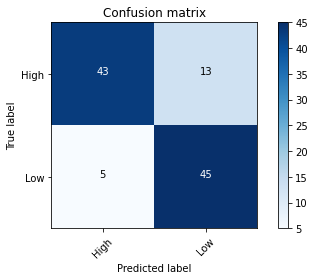

In [1466]:
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


cnf_matrix = confusion_matrix(y_test, y_pred_test)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['High','Low'],
                      title='Confusion matrix')

In [1448]:
print(f'False Positives: {fp}, False Negatives: {fn}')

False Positives: 13, False Negatives: 5


In [1455]:
pred_compare = pd.DataFrame(zip(y_test, y_pred_test), columns=['true', 'pred'])
pred_compare.true.value_counts()

high    56
low     50
Name: true, dtype: int64

In [1456]:
pred_compare.pred.value_counts()

low     58
high    48
Name: pred, dtype: int64

In [1506]:
tn, tp

(43, 45)

Looking at the confusion matrix, it is apparent that the model is more likely to wrongly predict a high-paying job as offering a low salary than vice versa.

Issues with making predictions on high a low salaries rather than more complex classifications or even attempting to predict the salary amount is that the accuracy of the predictions is greater, meaning that any information passed to clients is less likely to cause embarrassment or confusion. However, the high and low salary classifications are very broad and may not match up well with an amount that the client considers to be a high or a low salary. Therefore, there could still be some inadequacy to the model.

Regardless, if a client were to be told that the job they were interviewing for was a low paying role, there can't be any upset if they were to find that the salary was higher than expected, however it may damage the boss' relationship with the client if they believe they have been misinformed and that the salary offering renders the role unsuitable.

In [1428]:
rfc_best.named_steps

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('title', CountVectorizer(stop_words='english'),
                                  'title'),
                                 ('company',
                                  CountVectorizer(stop_words='english'),
                                  'company'),
                                 ('location',
                                  CountVectorizer(max_df=0.9,
                                                  stop_words='english'),
                                  'location'),
                                 ('country',
                                  OneHotEncoder(handle_unknown='ignore'),
                                  ['country'])]),
 'randomforestclassifier': RandomForestClassifier(n_estimators=200, n_jobs=-2, oob_score=True)}

In [1493]:
importances = rfc_best['randomforestclassifier'].feature_importances_

In [1494]:
names = rfc_best['columntransformer'].get_feature_names()

In [1495]:
features_df = pd.DataFrame(importances, index=names, columns=['coef'])

In [1496]:
feats = features_df.coef.sort_values(ascending=False)

In [1497]:
feats.head(10)

title__lead            0.039922
country__x0_usa        0.036042
title__analyst         0.023918
title__senior          0.022123
country__x0_england    0.021505
title__scientist       0.018656
company__harnham       0.014582
title__data            0.014287
title__head            0.013405
title__manager         0.012456
Name: coef, dtype: float64

In [1435]:
features_df[features_df.coef==0]

,coef
title__creative,0.0
title__decision,0.0
location__santa,0.0


### The Salary Discussion

- What are the tradeoffs between detecting high vs low salary?
- What are the differences and when do you want a high-recall or a high-precision model in this scenario.
- How do the ROC and precision-recall curves look for the prevailing model?

It could be said that the ideal score would be to achieve a high Recall score, since you would want to minimise the number of false negatives, thus reducing the number of predictions that falsely predict a high salary for the role.
If the features of the model held opposite importances and therefore the positive and negative assignments of high and low were reversed (i.e. correctly predicted high salaries were considered true positives rather than true negatives) we would rather have a high precision score, since the label of a false negative would become a false positive.

In [1483]:
from sklearn import metrics
import seaborn as sns
import scikitplot as skplt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", 3))

In [1474]:
def plot_f1_lines(figsize=(8,6),fontsize=16):

    fig, ax = plt.subplots(figsize=figsize)
    
    for const in np.linspace(0.2,0.9,8):
        x_vals = np.linspace(0.001, 0.999, 100)
        y_vals = 1./(2./const-1./x_vals)
        ax.plot(x_vals[y_vals > 0], y_vals[y_vals > 0],
                 color='lightblue', ls='--', alpha=0.9)
        ax.set_ylim([0, 1])
        ax.annotate('f1={0:0.1f}'.format(const),
                     xy=(x_vals[-10], y_vals[-2]+0.0), fontsize=fontsize)

    return fig, ax

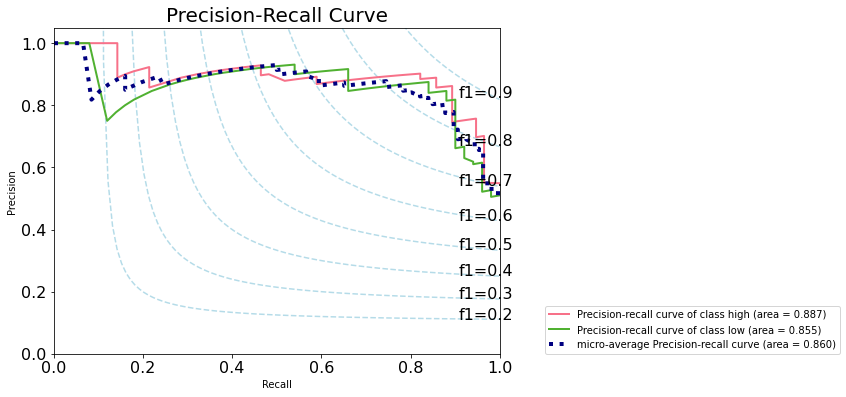

In [1480]:
fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_test, rfc_best.predict_proba(X_test), 
                       plot_micro=True, 
                       title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1,0])
plt.show()

In [1487]:
print('Area under precision-recall curve:')
for i, class_ in enumerate(rfc_best.classes_):
    print('Class {}:'.format(class_), 
          round(metrics.average_precision_score(y==class_, rfc_best.predict_proba(X)[:,i]), 4))

Area under precision-recall curve:
Class high: 0.9879
Class low: 0.9785


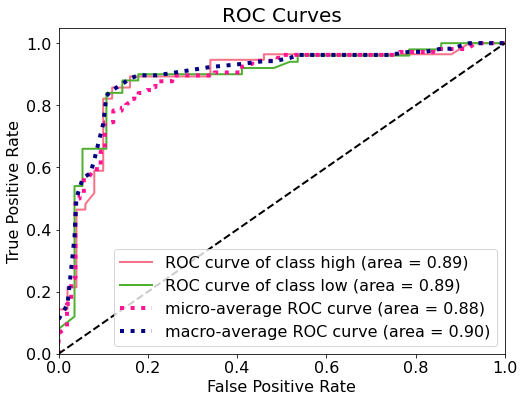

In [1488]:
skplt.metrics.plot_roc(y_test, rfc_best.predict_proba(X_test), plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(8,6), cmap=cmap)
plt.show()

In [1492]:
print('Area under ROC curve (ROC-AUC):')
for i, class_ in enumerate(rfc_best.classes_):
    print('Class {}:'.format(class_), 
          round(metrics.roc_auc_score(y==class_, rfc_best.predict_proba(X)[:, i]), 2))

Area under ROC curve (ROC-AUC):
Class high: 0.99
Class low: 0.99


Both ROC Curve and Precision-Recall have high area under the curve, showing high performance across the classification thresholds.

### Executive Summary (non-technical audience).

##### The Data:
In order to collect the data, I used scraping techniques, whereby the data was collated using job postings on the indeed.com websites for Singapore, UK and USA. Reaching just over 500 instances of unique data, I decided this was enough to begin building the model with.
Currencies and countries of each of the unique instances were recorded along with the data so that salary amounts could be standardised across the dataset, and so that the country could be passed into the model in addition to other location data to see whether predictive accuracy was affected positively. Data ranges were averaged, taking the mid-range value as the salary offer, and the median was used to establish a label for each datapoint indicating whether it was above the median or below.

##### Risks & Limitations:
With only just over 500 data points and an imbalance in the number of datapoints per country, it's difficult to know how accurately the model will predict on new data for Singaporean job listings compared with English job listings since there is so much more England-based data to train the model with than there is Singapore-based.

The model also has few features prior to feature extraction, the process of extracting detailed information from, for example, the non-standardised data presented in the job title which is subject to unregulated user input. For this reason, much of the accuracy of predictions falls down to how appropriately the feature extraction is conducted.

##### Feature Extraction & Considerations:
For feature extraction, certain keywords within the title such as senior, lead, managing, manager, junior, entry and others denoting levels of seniority were extracted using Natural Language Processing (NLP). NLP works by separating out the components in the text and indicating to the model what is contained within the title, thus allowing the model to establish trends in salary given keyword presence as stated above, as well as in the sense of the industry of application of the role.

The same NLP techniques were used on the location column, in order to give extra consideration to elements such as 'tx', indicating the State in which the job is offered (in this case, Texas).

It was considered that, for the job listing company data, a One Hot Encoder (OHE), which takes the entire company name and only considers trends with exact matches, might have been an ideal method of feature extraction given that the company names had well-regulated input; however, it was decided that trends amongst related establishments such as universities could be too valuable to lose, and therefore NLP was used again for the company data. After testing both, it was concluded that scores were improved when harnessing the company data via NLP.


##### Results:
Upon review of the final model results, the model appears to perform with a relatively high level of accuracy when applied to the defined train and test sets. Looking at the individual influence of the specific features taken in by the model, it is clear that jobs containing keywords denoting high responsibility and skill such as head, lead, analyst, manager and senior have great effect on classification of High salary to the job listings, with 'analyst' and 'scientist' roles bearing the highest probability of drawing a High salary.
Further investigation reveals that those jobs in the USA, and in England are likely to be higher paid than those in Singapore. Given that the data for Singapore is sparse, it is possible that these features have become more significant in predicting salary because the salaries in Singapore are generally lower than the median, despite Singapore being a highly expensive place to live.
Finally, it appears that the company offering the best salaries for data science roles in a recriutment company called Harnham, ranking higher than any other keyword in the companies column.


##### Recommendation for Future Improvements:
Improvements to the accuracy of the model may be possible through collection of further data, particularly many more from Singapore and addional datapoints from the USA. The inclusion of more countries would also be taken into consideration upon future amendment.



Features with High Absolute Importance:
title__lead            0.039922
country__x0_usa        0.036042
title__analyst         0.023918
title__senior          0.022123
country__x0_england    0.021505
title__scientist       0.018656
company__harnham       0.014582
title__data            0.014287
title__head            0.013405
title__manager         0.012456

### Blog Post

https://willsdatascienceblog.wordpress.com/2021/05/24/project-4-indeed-data-science-job-salary-predictor/